In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-04 17:57.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.


In [7]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:43) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
Spliced = adata.to_df(layer='Ms')+1
Unspliced = adata.to_df(layer='Mu')+1

In [9]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index                  Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w  \
index                                                                  
AAACCTGAGAGGGATA  587.263611 -0.127588  3.363943 -0.169135  6.896201   
AAACCTGAGCCTTGAT  586.946838 -0.113400  5.187983 -0.151667  6.690354   
AAACCTGAGGCAATTA  586.944458 -0.130267  6.129466 -0.169135  6.149990   
AAACCTGCATCATCCC  583.481445 -0.124190  4.789095 -0.177349  6.718060   
AAACCTGGTAAGTGGC  588.397888 -0.128237  3.509376 -0.167437  6.839715   
...                      ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  586.421509 -0.126201  6.951703 -0.174121  6.312164   
TTTGTCAAGTGTGGCA  583.625183 -0.117140  5.521288 -0.168367  7.431111   
TTTGTCAGTTGTTTGG  587.668030 -0.112818  4.834655 -0.183078  7.188201   
TTTGTCATCGAATGCT  584.297913 -0.124841  5.307898 -0.169135  6.879848   
TTTGTCATCTGTTTGT  586.787537 -0.122043  4.873916 -0.174350  6.588336   

index                 Mcm3   Fam135a       Adgrb3   Tmem131    Tbc1d8  ...  \
index                                                                  ...   
AAACCTGAGAGGGATA -0.018189  1.907083  1190.960693  0.288147  2.723814  ...   
AAACCTGAGCCTTGAT -0.018347  1.340493  1205.428467  0.076414  2.841131  ...   
AAACCTGAGGCAATTA -0.018194  1.642979  1228.784790 -0.018562  2.440828  ...   
AAACCTGCATCATCCC -0.017611  1.340804  1205.428467 -0.010290  2.703885  ...   
AAACCTGGTAAGTGGC -0.018110  0.767834   975.643066  0.055557  2.663697  ...   
...                    ...       ...          ...       ...       ...  ...   
TTTGTCAAGTGACATA -0.018159  1.725199  1266.444214  0.241368  2.670457  ...   
TTTGTCAAGTGTGGCA -0.017904  0.162157  1068.131714  0.096258  2.027007  ...   
TTTGTCAGTTGTTTGG -0.018024  0.865138  1205.428467  0.183546  3.189895  ...   
TTTGTCATCGAATGCT -0.018440  1.090288  1181.562256  0.386594  2.772038  ...   
TTTGTCATCTGTTTGT -0.018186  1.432037  1200.711182  0.095778  3.100301  ...   

index              Sh3kbp1   Map3k15      Rai2     Rbbp7     Ap1s2    Tmem27  \
index                                                                          
AAACCTGAGAGGGATA -0.089150 -0.272404 -0.162363 -0.078769 -0.172046 -0.009175   
AAACCTGAGCCTTGAT  0.000290 -0.234834 -0.168429 -0.074643 -0.219025 -0.009253   
AAACCTGAGGCAATTA -0.081799 -0.264003 -0.190150 -0.071975 -0.252876 -0.009685   
AAACCTGCATCATCCC  0.000861 -0.262392 -0.168429 -0.081333 -0.219025 -0.009131   
AAACCTGGTAAGTGGC -0.299592 -0.190896 -0.168429 -0.076006 -0.219025 -0.009132   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA -0.211625 -0.227361 -0.170492 -0.080846 -0.201324 -0.009337   
TTTGTCAAGTGTGGCA -0.231110 -0.590794 -0.167303 -0.078558 -0.250625 -0.009130   
TTTGTCAGTTGTTTGG  0.179356 -0.234834 -0.168429 -0.095529 -0.219025 -0.009130   
TTTGTCATCGAATGCT -0.144654 -0.245121 -0.175302 -0.069501 -0.355375 -0.010070   
TTTGTCATCTGTTTGT -0.004816 -0.289878 -0.163966 -0.069035 -0.165203 -0.009222   

index                   Uty     Ddx3y   Eif2s3y     Erdr1  
index                                                      
AAACCTGAGAGGGATA  15.195181 -0.258313 -0.262007  0.716062  
AAACCTGAGCCTTGAT  14.931433 -0.239264 -0.243101  0.313268  
AAACCTGAGGCAATTA  16.694969 -0.273740 -0.235780  0.641552  
AAACCTGCATCATCCC  16.613377 -0.350236 -0.243405  0.651895  
AAACCTGGTAAGTGGC  17.422050 -0.426187 -0.235244  1.112692  
...                     ...       ...       ...       ...  
TTTGTCAAGTGACATA  15.942089 -0.228885 -0.251585  0.764134  
TTTGTCAAGTGTGGCA  17.374771 -0.201322 -0.220168  0.566034  
TTTGTCAGTTGTTTGG  16.527048 -0.199367 -0.239110  0.361626  
TTTGTCATCGAATGCT  17.162189 -0.080966 -0.261882  0.851236  
TTTGTCATCTGTTTGT  16.748703 -0.282085 -0.218729  0.709966  

[3696 rows x 1945 columns]

In [10]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:49) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:01) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


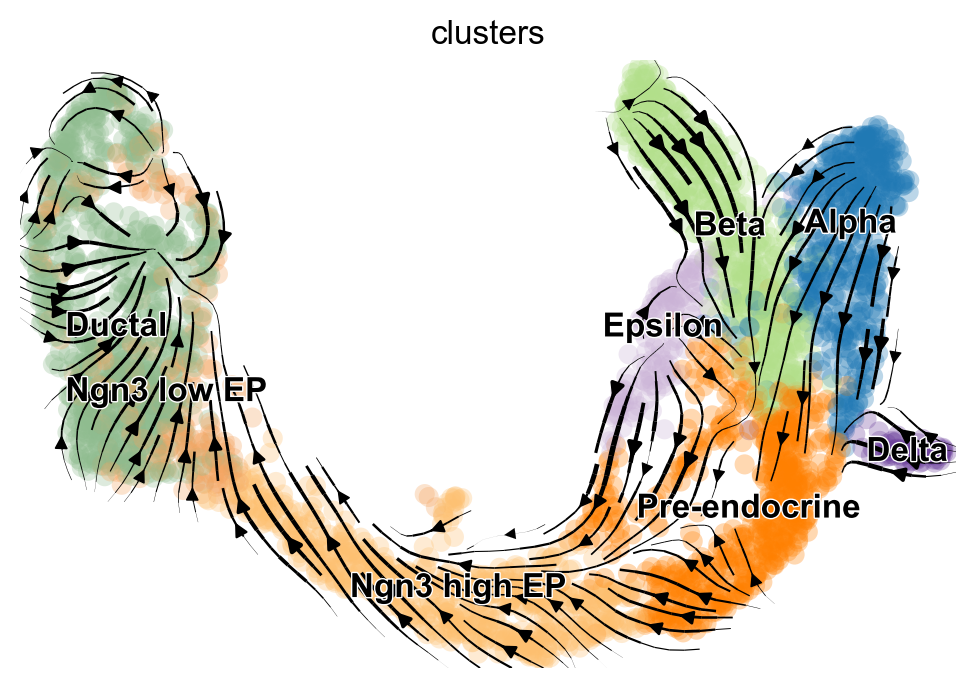

In [11]:
mc.acc_embedding_stream(adata)

In [12]:
mc.acc_graph(adata)

In [13]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

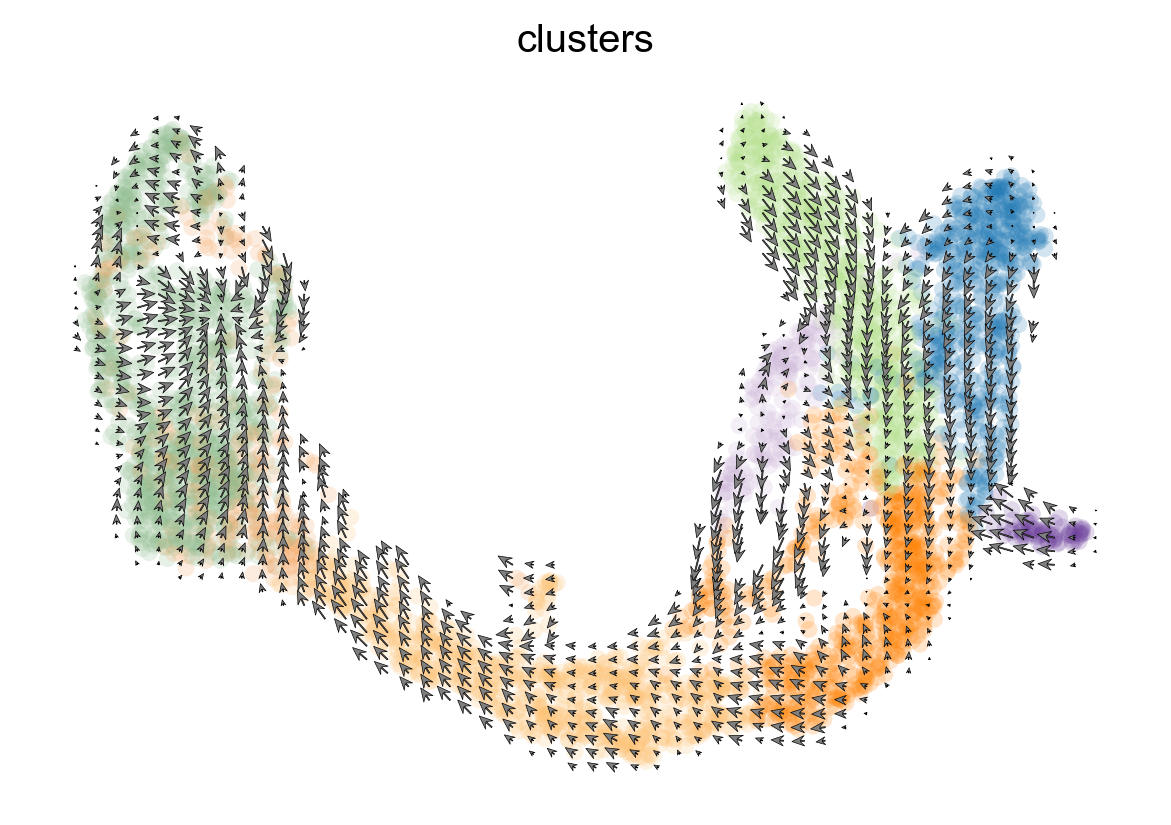

In [14]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

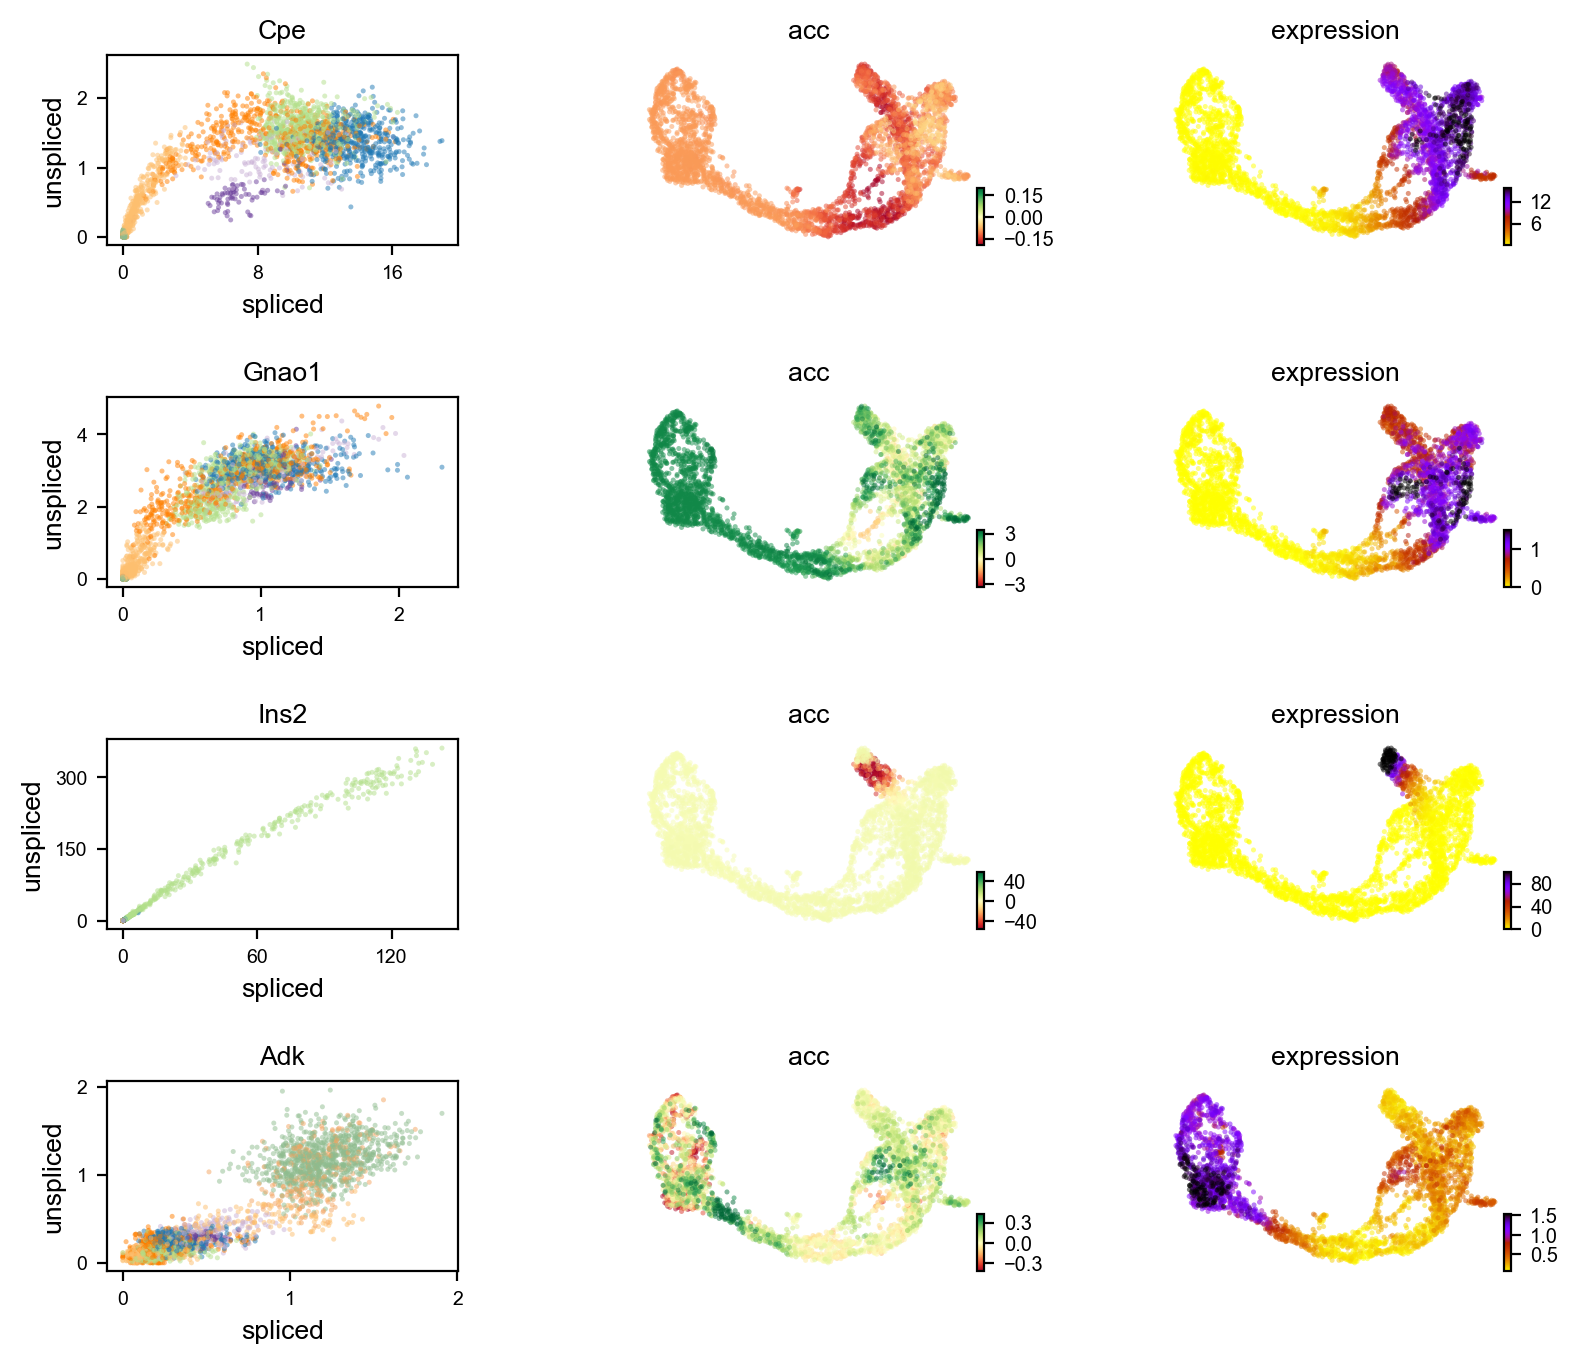

In [15]:
mc.acc(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


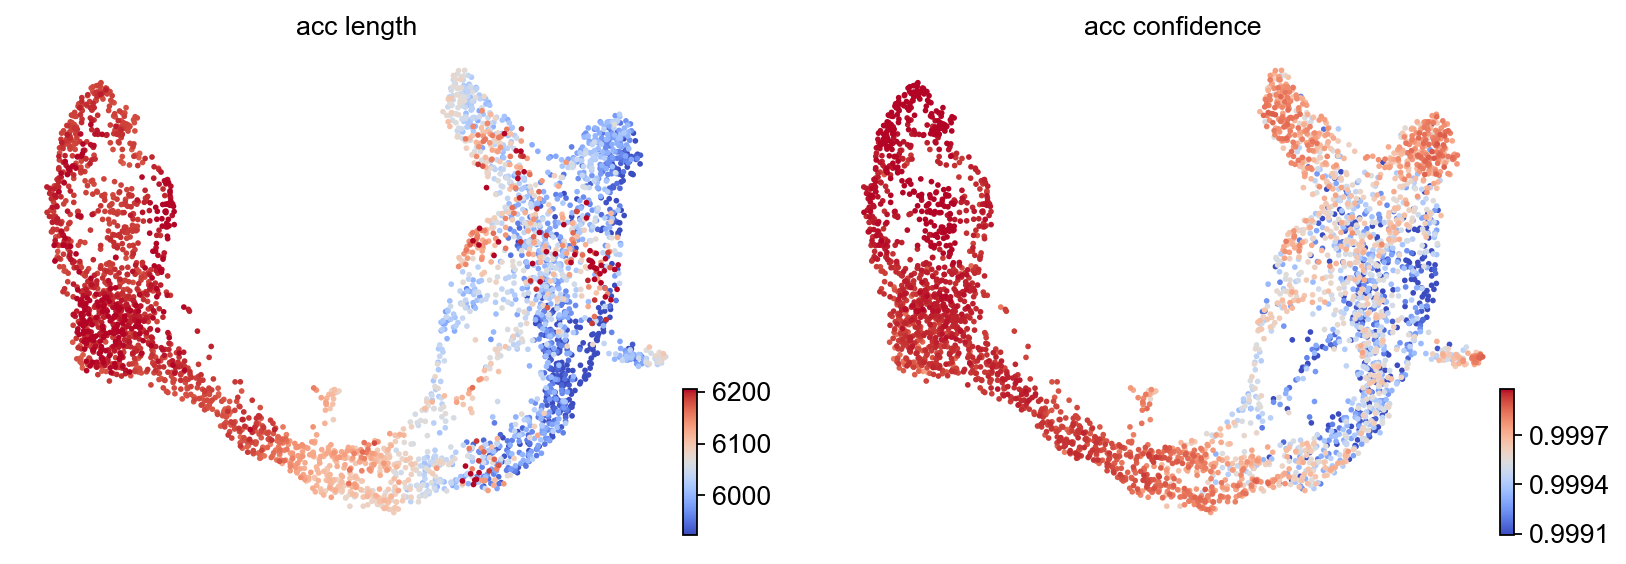

In [16]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

#### Steady State

In [17]:
gamma1 = Spliced/Unspliced
acc1 = Unspliced - (1+gamma1)*Unspliced + (gamma1**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc1

index                Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w       Mcm3  \
index                                                                           
AAACCTGAGAGGGATA -0.085685  0.795535 -0.801370  0.000000 -0.352247   0.033551   
AAACCTGAGCCTTGAT -0.107649  4.853466 -0.553495  2.193309 -0.282580   3.255521   
AAACCTGAGGCAATTA -0.107810  0.321124 -0.460272  0.000000 -0.449047   0.000000   
AAACCTGCATCATCCC -0.303873  3.129965 -0.603914  0.698218 -0.272084  16.919271   
AAACCTGGTAAGTGGC  0.000000  1.278237 -0.751328  0.077113 -0.223160   0.685971   
...                    ...       ...       ...       ...       ...        ...   
TTTGTCAAGTGACATA -0.142366  1.197835 -0.534014 -0.044692 -0.405756   0.235404   
TTTGTCAAGTGTGGCA -0.297081  2.942286 -0.414381  0.033870 -0.162604   4.423181   
TTTGTCAGTTGTTTGG -0.056445  3.369274 -0.645728  0.636846 -0.153171   1.850988   
TTTGTCATCGAATGCT -0.263930  0.553679 -0.711807  0.000000 -0.344134   0.299056   
TTTGTCATCTGTTTGT -0.118395  1.009320 -0.624344 -0.020800 -0.368066   0.048372   

index              Fam135a    Adgrb3   Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                     ...             
AAACCTGAGAGGGATA -0.253067 -0.719037  0.068332 -0.171713  ... -0.250101   
AAACCTGAGCCTTGAT -0.362032  0.000000 -0.200490 -0.046382  ... -0.113139   
AAACCTGAGGCAATTA -0.257862 -0.642030 -0.316984 -0.237717  ... -0.243043   
AAACCTGCATCATCCC -0.306278  0.000000 -0.273691 -0.053268  ... -0.117066   
AAACCTGGTAAGTGGC -0.808726 -1.014078 -0.212252 -0.397436  ... -0.477390   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA -0.448800 -0.938653  0.032486 -0.194667  ... -0.399760   
TTTGTCAAGTGTGGCA -0.896522 -0.989674 -0.182786 -0.628904  ... -0.401929   
TTTGTCAGTTGTTTGG -0.520712  0.000000 -0.041899  0.131525  ...  0.234771   
TTTGTCATCGAATGCT -0.544898 -0.644668  0.283877 -0.120790  ... -0.315173   
TTTGTCATCTGTTTGT -0.317756 -0.222268 -0.178648  0.045763  ... -0.126223   

index              Map3k15      Rai2      Rbbp7     Ap1s2      Tmem27  \
index                                                                   
AAACCTGAGAGGGATA -0.025276  2.250572   5.122244  0.451661   10.001575   
AAACCTGAGCCTTGAT  0.000000  0.000000  29.387602  0.000000    0.107059   
AAACCTGAGGCAATTA -0.033912  0.791692  12.326605  0.084614  952.683167   
AAACCTGCATCATCCC -0.082908  0.000000  42.390244  0.000000    0.035431   
AAACCTGGTAAGTGGC  1.119052  0.000000   3.707523  0.000000    0.000000   
...                    ...       ...        ...       ...         ...   
TTTGTCAAGTGACATA  0.269194  0.267567   3.843187  0.194701    2.119572   
TTTGTCAAGTGTGGCA -0.570368  0.050779   6.724442 -0.076947    0.052899   
TTTGTCAGTTGTTTGG  0.000000  0.000000  18.851271  0.000000    0.049019   
TTTGTCATCGAATGCT  0.329901  2.187747  21.264160 -0.210337  944.846130   
TTTGTCATCTGTTTGT -0.100775  1.568613  27.404613  0.768463  525.796509   

index                  Uty     Ddx3y   Eif2s3y     Erdr1  
index                                                     
AAACCTGAGAGGGATA -0.456652  0.029224  0.388947  0.177029  
AAACCTGAGCCTTGAT -0.551644  0.053655  0.467883 -0.335774  
AAACCTGAGGCAATTA -0.062960 -0.129968  0.042144  0.031216  
AAACCTGCATCATCCC -0.094097 -0.294522  0.077962 -0.254679  
AAACCTGGTAAGTGGC -0.021860 -0.399935  0.378143  0.997575  
...                    ...       ...       ...       ...  
TTTGTCAAGTGACATA -0.300298  0.144848  0.023071  0.092196  
TTTGTCAAGTGTGGCA  0.050844  0.127089  0.224050 -0.201877  
TTTGTCAGTTGTTTGG -0.125382  0.028845  0.010246 -0.354971  
TTTGTCATCGAATGCT -0.271269  0.790501  0.173173  0.234962  
TTTGTCATCTGTTTGT -0.181753 -0.147376  0.366132  0.115906  

[3696 rows x 1945 columns]

In [18]:
adata.layers['acc'] = acc1
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:52) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:01) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


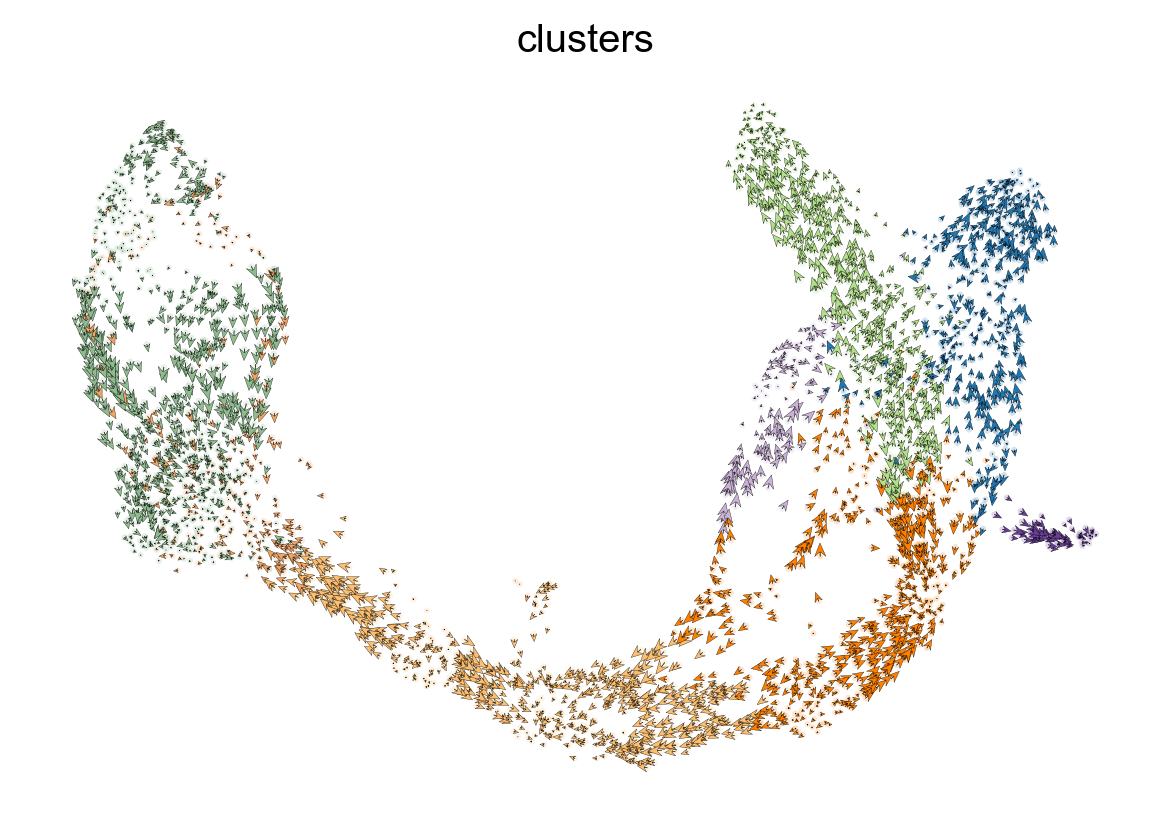

In [19]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

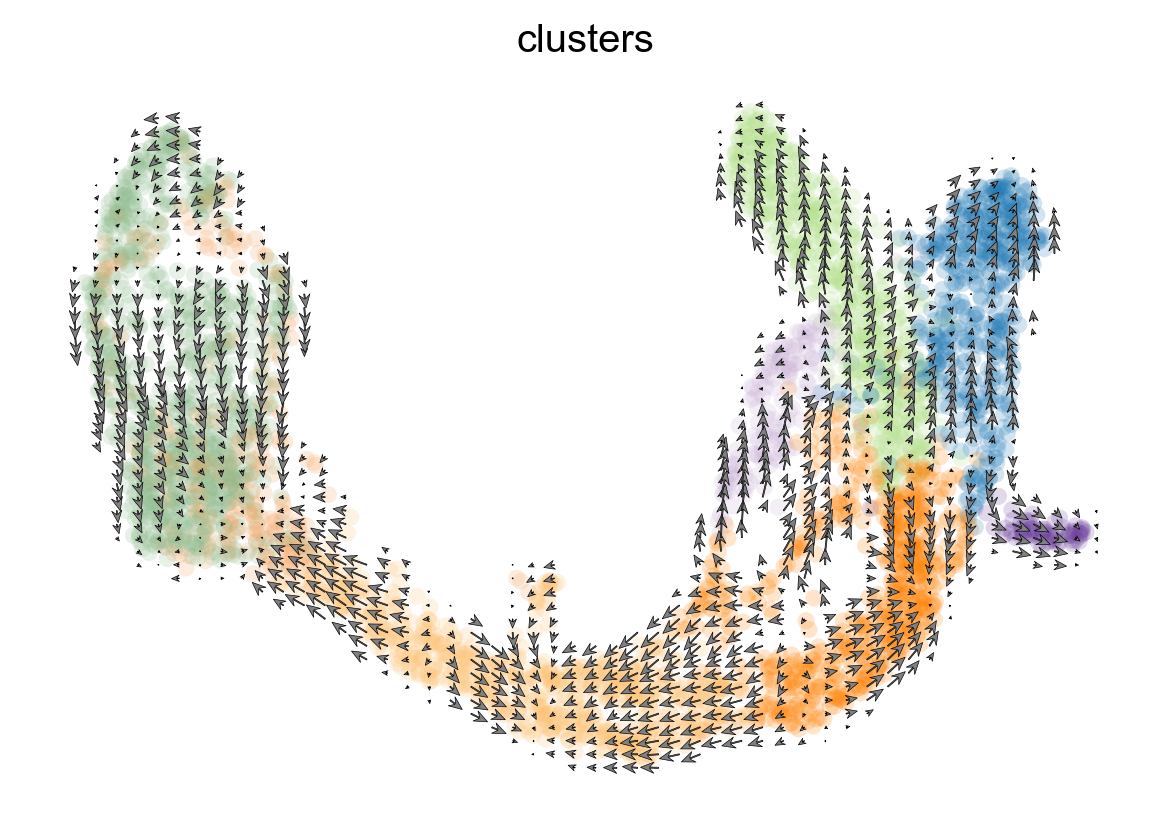

In [20]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

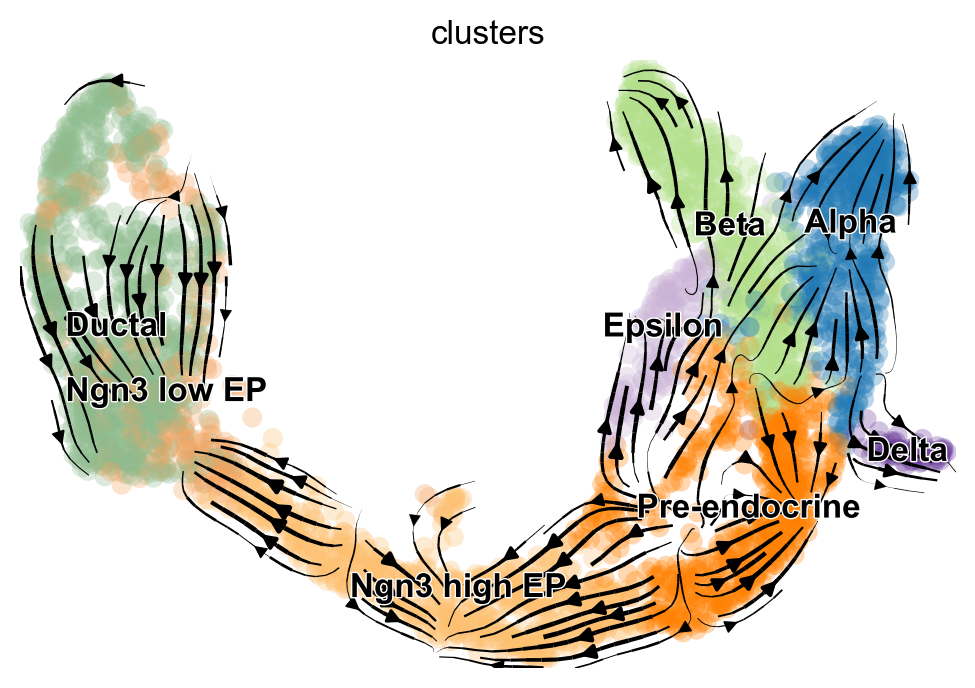

In [21]:
mc.acc_embedding_stream(adata)

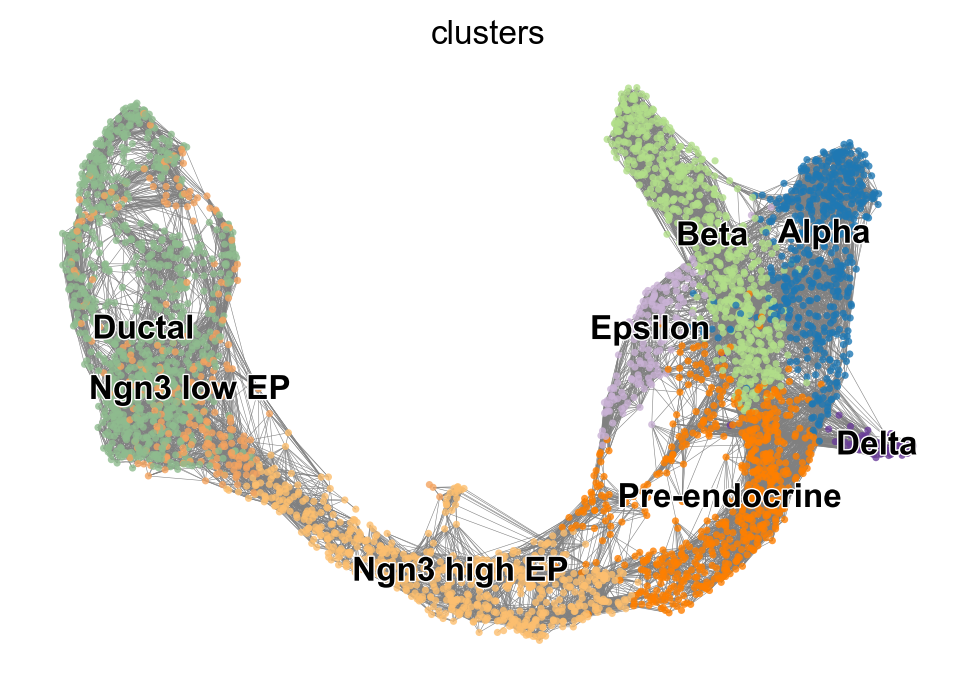

In [22]:
mc.acc_graph(adata)

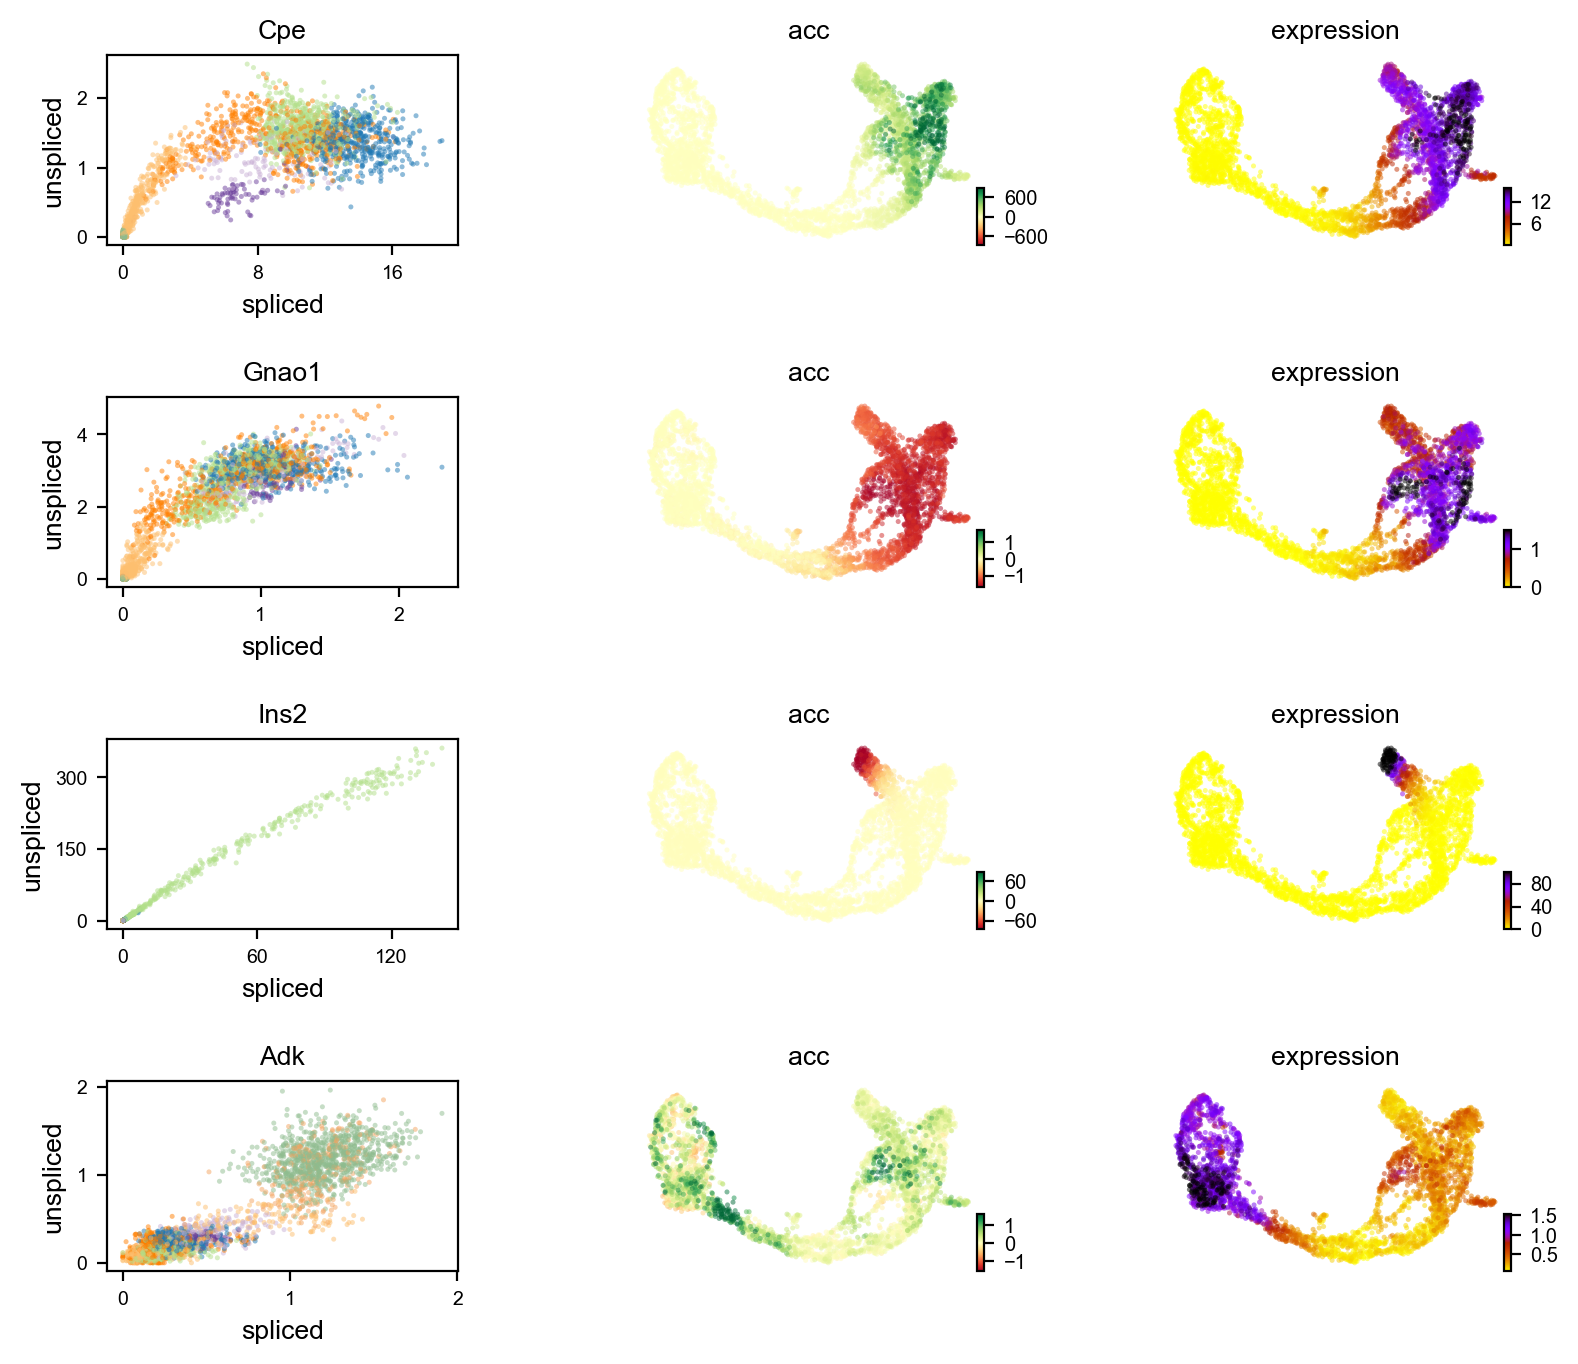

In [23]:
mc.acc(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

In [24]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

mt.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 3 regions of root cells and 3 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


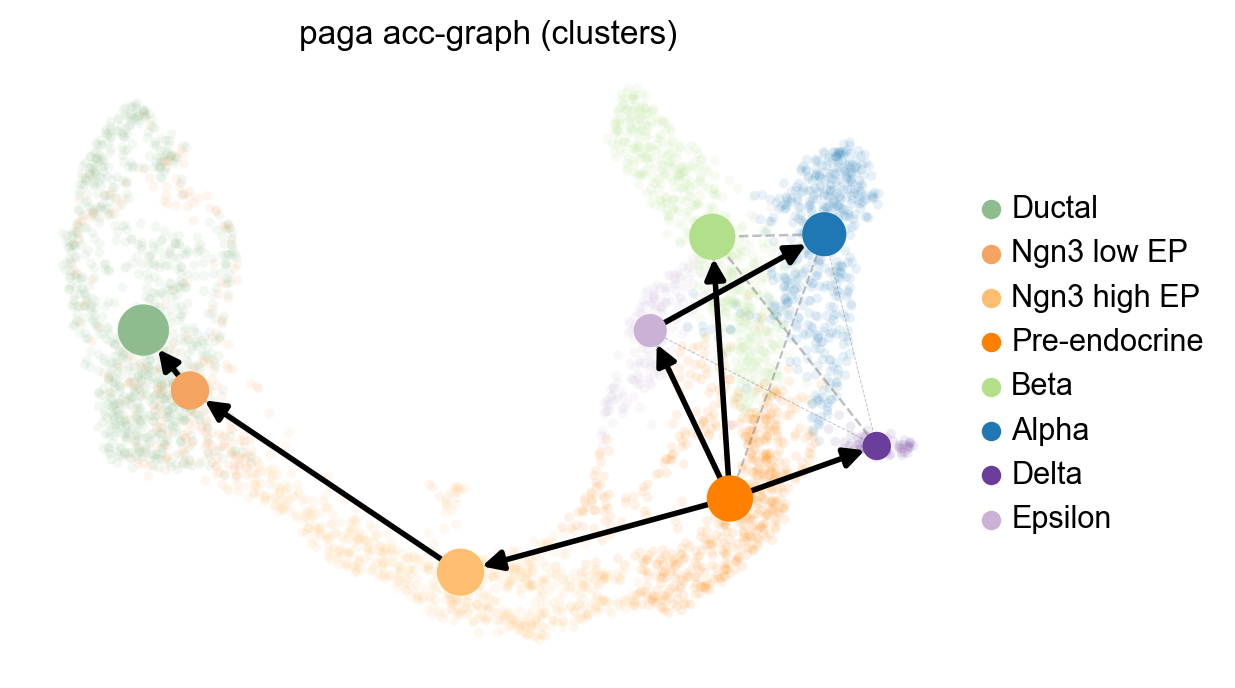

In [25]:
mc.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)


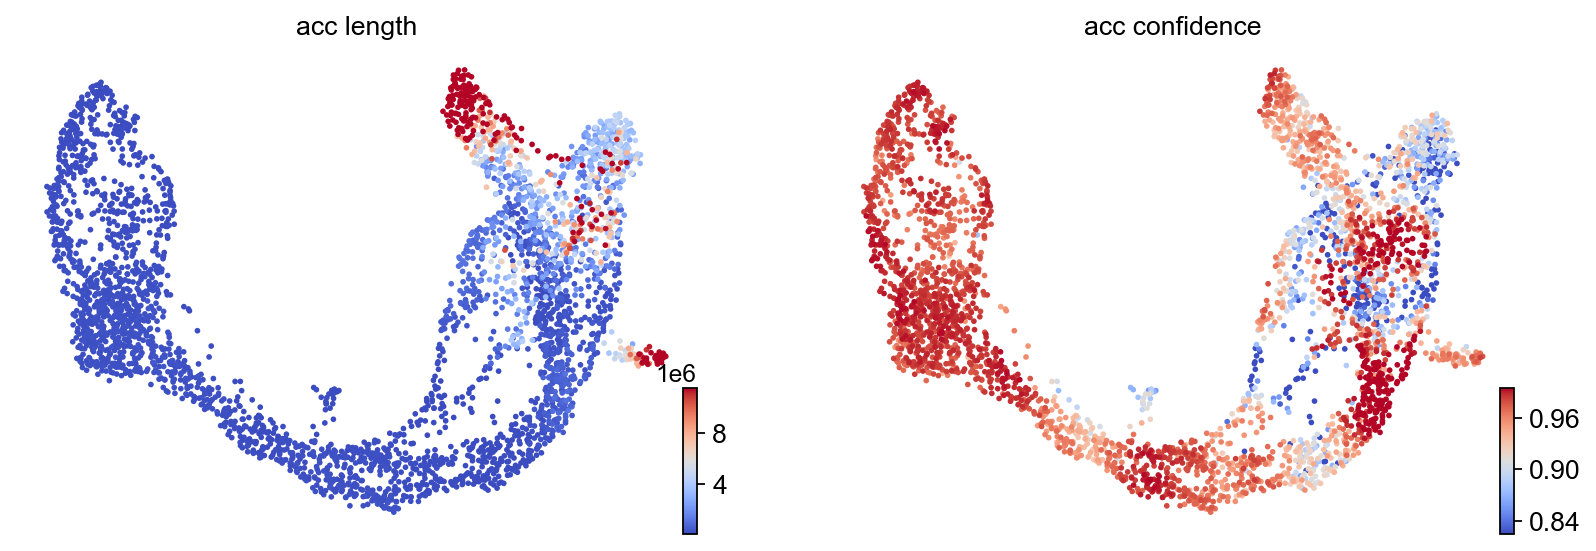

In [26]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])